In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.tsv', sep = '\t')

In [3]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
df.shape

(156060, 4)

In [5]:
df.isnull().sum().any()

False

In [6]:
df['PhraseId'].nunique()

156060

In [7]:
df['SentenceId'].nunique()

8529

In [8]:
df['Phrase'][54]

'amounts'

In [9]:
df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [10]:
df['Sentiment'].replace(0, value = 'negative', inplace = True)
df['Sentiment'].replace(1, value = 'negative', inplace = True)

In [11]:
df['Sentiment'].replace(3, value = 'positive', inplace = True)
df['Sentiment'].replace(4, value = 'positive', inplace = True)

In [12]:
df.shape

(156060, 4)

In [13]:
df = df[df['Sentiment'] != 2]

In [14]:
df.shape

(76478, 4)

In [15]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
21,22,1,good for the goose,positive
22,23,1,good,positive
33,34,1,"the gander , some of which occasionally amuses...",negative
46,47,1,amuses,positive


### Import libraries

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [17]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("averaged_perceptron_tagger")
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/navarra/snap/jupyter/6/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/navarra/snap/jupyter/6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/navarra/snap/jupyter/6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/navarra/snap/jupyter/6/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/navarra/snap/jupyter/6/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /home/navarra/snap/jupyter/6/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [18]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
21,22,1,good for the goose,positive
22,23,1,good,positive
33,34,1,"the gander , some of which occasionally amuses...",negative
46,47,1,amuses,positive


In [19]:
df['Sentiment'].value_counts()

positive    42133
negative    34345
Name: Sentiment, dtype: int64

<AxesSubplot:>

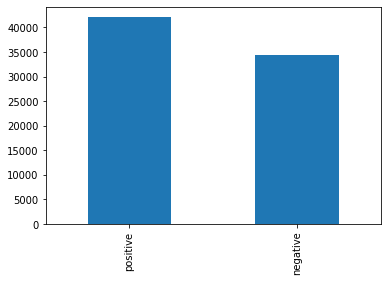

In [20]:
df['Sentiment'].value_counts().plot.bar()

### Handling with ouliers

#### Model can't count rare words. imagine these are noise and drop them.

In [21]:
# rare_words = pd.Series(' '.join(df['sentences']).split()).value_counts()[-1000:]
# df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

### Cleaning the data with NLP Cleaning Process

In [22]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# from nltk.stem import PorterStemmer

In [23]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

In [24]:
def cleaning(data):
    
    text_tokens = word_tokenize(data.lower())
    
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    tokens_without_sw = [w for w in tokens_without_punc if w not in stop_words]
    
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    return ' '.join(text_cleaned)

In [25]:
df['Phrase_2'] = df['Phrase'].apply(cleaning)

In [26]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_2
0,1,1,A series of escapades demonstrating the adage ...,negative,series escapade demonstrating adage good goose...
21,22,1,good for the goose,positive,good goose
22,23,1,good,positive,good
33,34,1,"the gander , some of which occasionally amuses...",negative,gander occasionally amuses none amount much story
46,47,1,amuses,positive,amuses


### Split the data

In [45]:
X = df['Phrase_2']
y = df['Sentiment']

### Word2Vec

In [73]:
def cleaning_2(data):
    
    text_tokens = word_tokenize(data.lower())
    
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    tokens_without_sw = [w for w in tokens_without_punc if w not in stop_words]
    
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    return text_cleaned

In [46]:
from gensim.models import Word2Vec

In [75]:
df_X = df[['Phrase_2']]

In [77]:
df_X = df['Phrase'].apply(cleaning_2)

In [80]:
df_X

0         [series, escapade, demonstrating, adage, good,...
21                                            [good, goose]
22                                                   [good]
33        [gander, occasionally, amuses, none, amount, m...
46                                                 [amuses]
                                ...                        
156047    [quietly, suggesting, sadness, obsession, bene...
156051                                 [sadness, obsession]
156052                                            [sadness]
156056                         [forced, avuncular, chortle]
156057                                 [avuncular, chortle]
Name: Phrase, Length: 76478, dtype: object

In [81]:
df_X.iloc[0]

['series',
 'escapade',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'also',
 'good',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amount',
 'much',
 'story']

In [82]:
text=[]
for i in range(len(df_X)):
    a = df_X.iloc[i]
    text.append(a)

In [83]:
text[0:2]

[['series',
  'escapade',
  'demonstrating',
  'adage',
  'good',
  'goose',
  'also',
  'good',
  'gander',
  'occasionally',
  'amuses',
  'none',
  'amount',
  'much',
  'story'],
 ['good', 'goose']]

In [84]:
model = Word2Vec(text, size=100, window=3, min_count=5, sg=1)

In [85]:
W = list(model.wv.vocab)

In [86]:
W[:10]

['series',
 'escapade',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'also',
 'occasionally',
 'none',
 'amount']

In [88]:
model.wv['series']

array([-0.17616446,  0.06429908,  0.07909531,  0.19287945, -0.2270491 ,
        0.2888474 ,  0.29280105, -0.19866419,  0.07858328,  0.03600788,
        0.1125919 ,  0.16007803, -0.4000834 , -0.01909762,  0.15396702,
       -0.2795739 , -0.16601342,  0.01675851,  0.06163266, -0.20594832,
       -0.14685014,  0.20438664,  0.25576288,  0.08796412,  0.19232936,
       -0.04696421,  0.20586964,  0.30380377,  0.01733523, -0.13582812,
       -0.01412207,  0.07391098,  0.15805271, -0.18509014, -0.44106892,
        0.05688392, -0.00370797,  0.23133467,  0.18758889,  0.11440708,
       -0.12307502, -0.06463904, -0.20064148,  0.08570042,  0.01887773,
        0.1596915 , -0.02093805, -0.07851215,  0.01221538, -0.16769093,
        0.1302745 ,  0.16410227, -0.22131917, -0.00846362,  0.13587831,
        0.1659789 , -0.26697004,  0.22550713, -0.00675671, -0.02658472,
       -0.22159395,  0.15670164, -0.07232922, -0.37111008,  0.36247036,
        0.07473758, -0.19401069, -0.13152337, -0.3233141 , -0.24

In [89]:
model.wv.most_similar('series')

[('bore', 0.8898447751998901),
 ('quickie', 0.8800351619720459),
 ('episode', 0.8795594573020935),
 ('deniro', 0.8715276718139648),
 ('morning', 0.8701702356338501),
 ('junk', 0.8695707321166992),
 ('commercial', 0.8668630719184875),
 ('invited', 0.862683892250061),
 ('saturday', 0.8613271713256836),
 ('antwone', 0.8583276867866516)]

In [91]:
model.

In [92]:
model.most_similar(positive=['morning', 'saturday'], topn=1)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('evaporates', 0.9662623405456543)]

In [95]:
model.wv.most_similar('evaporates')

[('fragment', 0.9952223896980286),
 ('crypt', 0.9925722479820251),
 ('infomercial', 0.989115834236145),
 ('underdone', 0.9889779686927795),
 ('mist', 0.9828251004219055),
 ('ram', 0.9825501441955566),
 ('pinocchio', 0.9789921641349792),
 ('copout', 0.9779806137084961),
 ('commiserating', 0.9766625165939331),
 ('eyeball', 0.9765297174453735)]

In [96]:
model.most_similar(positive=['morning', 'saturday'], negative=['fragment'], topn=1)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('missed', 0.9216814637184143)]

### Count Vectorization

In [104]:
X = df['Phrase_2']
y = df['Sentiment']

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
X_v = CountVectorizer().fit_transform(X)

### TfidfTransformer

In [30]:
X = df['Phrase_2']
y = df['Sentiment']

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
X = TfidfVectorizer().fit_transform(X)

### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train_v, X_test_v, y_train, y_test = train_test_split(X_v, y, test_size=0.25, random_state=1)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Tranining Model with Naive Bayes

In [39]:
from sklearn import model_selection

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(X_train_v, y_train)

In [36]:
pred = nb.predict(X_test_v)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7117 1526]
 [1267 9210]]
              precision    recall  f1-score   support

    negative       0.85      0.82      0.84      8643
    positive       0.86      0.88      0.87     10477

    accuracy                           0.85     19120
   macro avg       0.85      0.85      0.85     19120
weighted avg       0.85      0.85      0.85     19120



In [40]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_v, y_train)
nb_accuracy_count = model_selection.cross_val_score(nb_classifier,
                                           X_test_v,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", nb_accuracy_count)

Count Vectors Accuracy: 0.8240062761506277


In [41]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(X_train, y_train)

pred = nb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[6985 1658]
 [1033 9444]]
              precision    recall  f1-score   support

    negative       0.87      0.81      0.84      8643
    positive       0.85      0.90      0.88     10477

    accuracy                           0.86     19120
   macro avg       0.86      0.85      0.86     19120
weighted avg       0.86      0.86      0.86     19120



In [42]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_accuracy_tf = model_selection.cross_val_score(nb_classifier,
                                           X_test,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", nb_accuracy_tf)

TF-IDF Accuracy: 0.825418410041841


### Tranining Model with Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))

[[7165 1478]
 [1110 9367]]
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      8643
    positive       0.86      0.89      0.88     10477

    accuracy                           0.86     19120
   macro avg       0.86      0.86      0.86     19120
weighted avg       0.86      0.86      0.86     19120



In [99]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train, y_train)
log_accuracy_tf = model_selection.cross_val_score(log_classifier,
                                           X_test,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", log_accuracy_tf)

TF-IDF Accuracy: 0.8235878661087865


In [98]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train_v, y_train)
pred_logreg_v = logreg.predict(X_test_v)
print(confusion_matrix(y_test, pred_logreg_v))
print(classification_report(y_test, pred_logreg_v))

[[7205 1438]
 [1010 9467]]
              precision    recall  f1-score   support

    negative       0.88      0.83      0.85      8643
    positive       0.87      0.90      0.89     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.87      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [100]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_v, y_train)
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                           X_test_v,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_accuracy_count)

Count Vectors Accuracy: 0.8269874476987447


### Training Model with DecisionTree

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_v , y_train)
y_pred_dt_v = dsc_classifier.predict(X_test_v)
print(confusion_matrix(y_test,y_pred_dt_v))
print(classification_report(y_test, y_pred_dt_v))

[[7184 1459]
 [1067 9410]]
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      8643
    positive       0.87      0.90      0.88     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.86      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [106]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_v , y_train)
dsc_accuracy_count = model_selection.cross_val_score(dsc_classifier,
                                           X_test_v,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", dsc_accuracy_count)

Count Vectors Accuracy: 0.7813284518828452


In [107]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train, y_train)
y_pred_dt = dsc_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[7069 1574]
 [1092 9385]]
              precision    recall  f1-score   support

    negative       0.87      0.82      0.84      8643
    positive       0.86      0.90      0.88     10477

    accuracy                           0.86     19120
   macro avg       0.86      0.86      0.86     19120
weighted avg       0.86      0.86      0.86     19120



In [108]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train , y_train)
dsc_accuracy_tf = model_selection.cross_val_score(dsc_classifier,
                                           X_test,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", dsc_accuracy_tf)

TF-IDF Accuracy: 0.7798640167364017


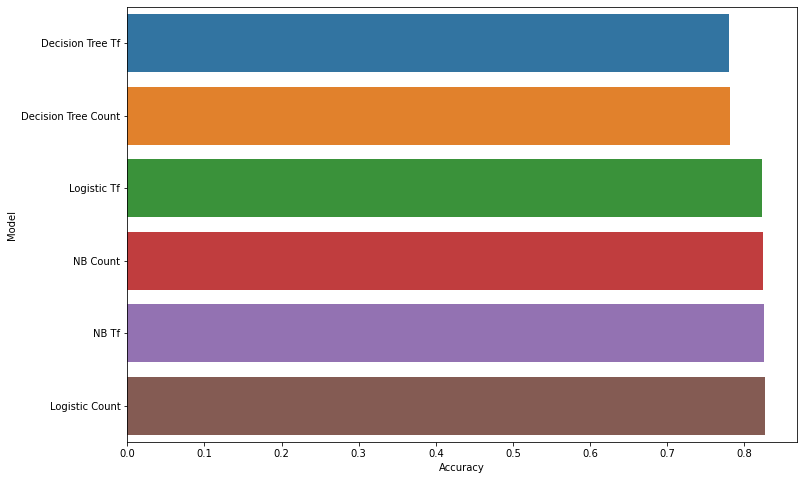

In [109]:
compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "NB Count", "NB Tf", "Decision Tree Count","Decision Tree Tf"],
                        "Accuracy": [log_accuracy_count, log_accuracy_tf, nb_accuracy_count, nb_accuracy_tf, dsc_accuracy_count,dsc_accuracy_tf]})
compare = compare.sort_values(by="Accuracy", ascending=True)
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)

### Label Encoder

#### if we want to use label encoder for our label/sentiment set

In [82]:
X = df['Phrase_2']
y = df['Sentiment']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [75]:
from sklearn import preprocessing

In [76]:
encoder = preprocessing.LabelEncoder()

In [77]:
y_train = encoder.fit_transform(y_train)

In [78]:
y_test = encoder.fit_transform(y_test)

In [79]:
y_train[0 : 5]

array([1, 0, 1, 0, 1])

In [81]:
y_test[0 : 5]

array([1, 0, 1, 0, 0])